<h2 align="center">Predicting Titanic Passenger Survival  
    <h2 align="center">with Supervised Machine Learning, by Logistic Regression (Classification)
</h2>

__1) The Goal:__ Build a machine learning model that is able to predict which of the passengers of the Titanic has survived or not.  
__2) Get the Data:__ The data is given.  
__3) Split the Data:__ The data is already split: "train.csv" and "test.csv".  
__4) Exploratory Data Analysis (EDA)__  
__5)-9) Feature Engineering (FE), Train Model, Optimize Hyperparameters/Cross-Validation__

- Train a Logistic Regression classification model (alternative models: Decision Trees, Random Forest)
- Create features using one-hot encoding
- Calculate the train and test accuracy
- Calculate a cross-validation score
- Train a Random Forest classification model

__10) Calculate Test Score:__ Use the test data set aside to calculate the test score.

__11) Deploy and Monitor:__ Submit your prediction to Kaggle.  

<h2> <center>Exploratory Data Analysis</h2> </center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
import statsmodels.discrete.discrete_model as sm

#### Step 1: Read the file train.csv into Python and print a few rows.

In [2]:
train = pd.read_csv('./raw data/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Step 2: Calculate the number of surviving/non-surviving passengers and display it as a bar plot.

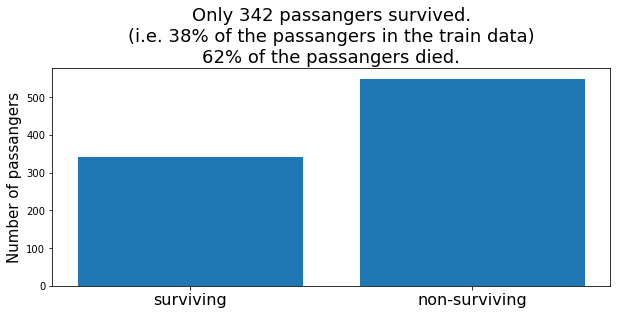

In [3]:
i=sum(train['Survived'])

labels_step2 = ['surviving', 'non-surviving']
x = np.arange(len(labels_step2))
y = [sum(train['Survived']), (train['Survived'].count()-sum(train['Survived']))]
 
plt.figure(figsize=(10,4)) 
plt.bar(x, y)
plt.xticks(x, labels_step2, size=16)

plt.title(f"Only {i} passangers survived.\n\
(i.e. {round(100*train['Survived'].sum()/len(train))}% of the passangers in the train data)\n\
{round(100*(len(train)-train['Survived'].sum())/len(train))}% of the passangers died.", fontsize=18)
plt.ylabel('Number of passangers', fontsize=15)
plt.show()

#### Step 3: Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

In [4]:
print(f"{train[(train['Pclass']==1) & (train['Survived']==1)]['Survived'].count()} first class passengers survived,\n\
i.e. {100*round(train[(train['Pclass']==1) & (train['Survived']==1)]['Survived'].count()/sum(train['Pclass']==1),2)}% of the 1st class passengers\n\
and {100*round(train[(train['Pclass']==1) & (train['Survived']==1)]['Survived'].count()/len(train),2)}% of all passengers.")

136 first class passengers survived,
i.e. 63.0% of the 1st class passengers
and 15.0% of all passengers.


#### Step 4: Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.

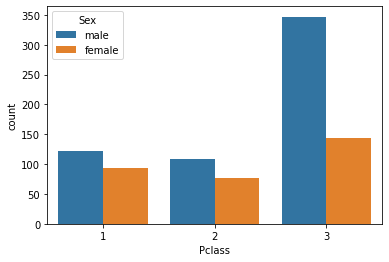

In [5]:
ax = sns.countplot(x="Pclass", hue="Sex", data=train)

#### Step 5: Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

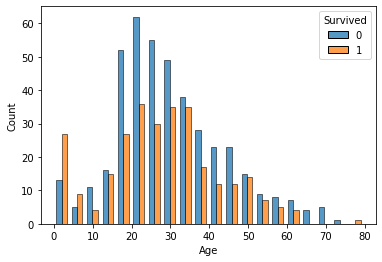

In [6]:
ax = sns.histplot(x="Age", hue="Survived", data=train, multiple="dodge", shrink = 0.7)

#### Step 6: Calculate the average age for survived and drowned passengers separately.

In [7]:
print('The average age of the survived passengers is {}, and the average age of the drowned passengers is {}.'.format(round(train.groupby('Survived')['Age'].mean().tolist()[0]),round(train.groupby('Survived')['Age'].mean().tolist()[1])))

The average age of the survived passengers is 31, and the average age of the drowned passengers is 28.


#### Step 7: Replace missing age values by the mean age.

In [8]:
train['Age_mean_imputed'] = train['Age'].fillna(round(np.float64(train['Age'].mean()),1))

#### Step 8: Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

In [9]:
pd.crosstab(train['Pclass'], [train['Sex'], train['Survived']], rownames=['Pclass'], colnames=['Sex', 'Survived'])

Sex      female     male    
Survived      0   1    0   1
Pclass                      
1             3  91   77  45
2             6  70   91  17
3            72  72  300  47

<h2> <center>Feature Engineering</h2> </center>

In [10]:
train.fillna(0.0, inplace=True) # little crutch to make the data work

### Binning: a numerical column is converted to categories  

(891, 4)


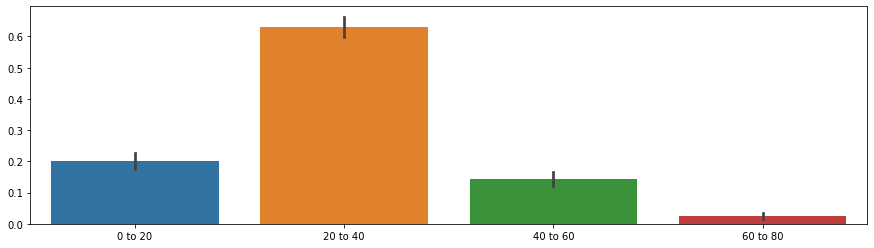

In [11]:
# transform a numerical column
kbins = KBinsDiscretizer(n_bins=4, encode='onehot', strategy='uniform')
columns = train[['Age_mean_imputed']]
kbins.fit(columns)
t = kbins.transform(columns)
t = t.todense()  # before this, t is a sparse matrix data type

# create nice labels
edges = kbins.bin_edges_[0].astype('int32')
labels = []
for i in range(len(edges)-1):
    edge1 = edges[i]
    edge2 = edges[i+1]
    labels.append(f"{edge1} to {edge2}")
    
print(t.shape)
age_binned = pd.DataFrame(t, columns=labels)
plt.figure(figsize=(15,4)) 
ax = sns.barplot(data=age_binned)

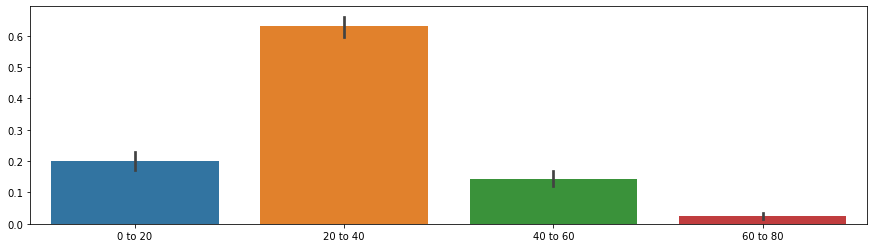

In [12]:
# create a DataFrame
age_binned = pd.DataFrame(t, columns=labels)
plt.figure(figsize=(15,4)) 
ax = sns.barplot(data=age_binned)

In [13]:
train = pd.concat([train, age_binned], axis=1)

In [14]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean_imputed,0 to 20,20 to 40,40 to 60,60 to 80
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,22.0,0.0,1.0,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,26.0,0.0,1.0,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,0.0,1.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,35.0,0.0,1.0,0.0,0.0


<h2> <center>Train the Model</h2> </center>

In [25]:
X = train.drop(columns=['Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'])
y = train['Survived']
X.head(2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Age_mean_imputed,0 to 20,20 to 40,40 to 60,60 to 80
0,1,3,22.0,1,0,7.2500,22.0,0.0,1.0,0.0,0.0
1,2,1,38.0,1,0,71.2833,38.0,0.0,1.0,0.0,0.0


In [31]:
test = pd.read_csv('./raw data/test.csv')
test['Age_mean_imputed'] = train['Age'].fillna(round(np.float64(train['Age'].mean()),1))
test.fillna(0.0, inplace=True) # little crutch to make the data work

# transform a numerical column
kbins = KBinsDiscretizer(n_bins=4, encode='onehot', strategy='uniform')
columns = test[['Age_mean_imputed']]
kbins.fit(columns)
t = kbins.transform(columns)
t = t.todense()  # before this, t is a sparse matrix data type

# create nice labels
edges = kbins.bin_edges_[0].astype('int32')
labels = []
for i in range(len(edges)-1):
    edge1 = edges[i]
    edge2 = edges[i+1]
    labels.append(f"{edge1} to {edge2}")
    
age_binned = pd.DataFrame(t, columns=labels)
test = pd.concat([test, age_binned], axis=1)

X_new = test.drop(columns=['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'])
X_new.head(2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Age_mean_imputed,0 to 17,17 to 35,35 to 53,53 to 71
0,892,3,34.5,0,0,7.8292,22.0,0.0,1.0,0.0,0.0
1,893,3,47.0,1,0,7.0000,38.0,0.0,0.0,1.0,0.0


In [35]:
m = LogisticRegression()
m.fit(X, y)
print(m.score(X,y), m.predict(X_new))

0.6980920314253648 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0
 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1
 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0
 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1
 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0
 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0
 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0
 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0
 1 0 0 0 1 0 0 1 0 0 0]


/home/aksoyoglu/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
logit = sm.Logit(y, X)
f = logit.fit()
print(f.params)
print(f.summary())

<h2> <center>Optimize Hyperparameters/Cross-Validation</h2> </center>

Train Model, Optimize Hyperparameters/Cross-Validation

- Train a Logistic Regression classification model (alternative models: Decision Trees, Random Forest)
- Create features using one-hot encoding
- Calculate the train and test accuracy
- Calculate a cross-validation score
- Train a Random Forest classification model
- Submit the predictions to Kaggle
- Give a 5-minute lightning talk by the end of the week

#### 10) Calculate Test Score
- Use the test data set aside to calculate the test score.

#### 11) Deploy and Monitor

<h2> <center>Calculate Test Score</h2> </center>



<h2> <center>Evaluate the Model using the Test Data</h2> </center>

- accuracy
- confussion matrix: precission, recall, F1-score

<h2> <center>Make Predictions</h2> </center>